In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
PLOTS_PATH = os.getenv("PLOTS_PATH")

# Load test data
TEST_PATH = os.getenv("TEST_PATH")
df_test = pd.read_csv(os.path.join('..',TEST_PATH,"AAPL_2010-01-01_2023-01-01.csv"), index_col="Date", parse_dates=True)

# Load predictions and actual values
PREDICTIONS_PATH = os.getenv("PREDICTIONS_PATH")
df = pd.read_csv(os.path.join('..',PREDICTIONS_PATH,"predictions_best_lstm_model.csv"))



In [10]:
# Compute next day's predicted price using the previous day's actual price and the predicted return from the model
df_test["predicted"] = df_test["Close"].shift(-1) * (1 + df_test["Next_Day_Return"])
print(df_test.predicted.head())

Date
2021-10-14    145.928112
2021-10-15    148.280198
2021-10-18    151.003313
2021-10-19    149.761675
2021-10-20    149.700321
Name: predicted, dtype: float64


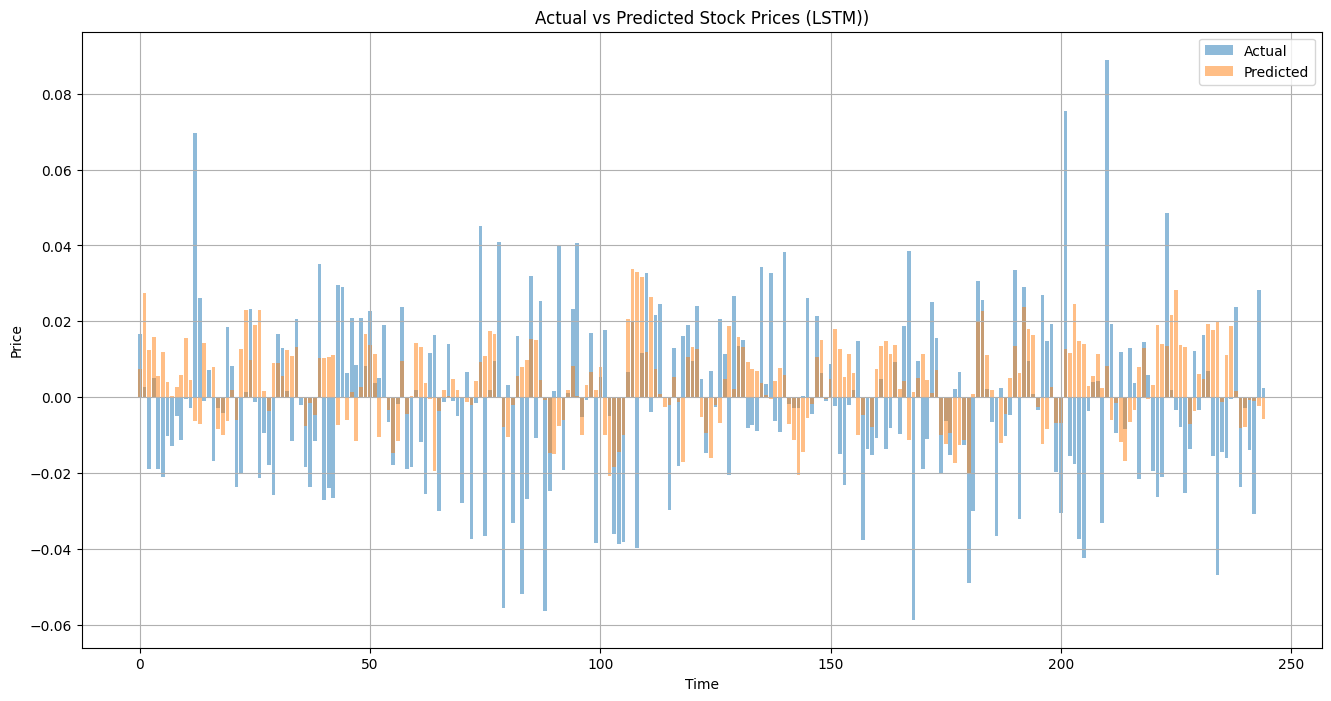

In [13]:
plt.figure(figsize=(16, 8))
plt.bar(df.index,df["actual"], label="Actual",alpha=0.5)
plt.bar(df.index,df["predicted"], label="Predicted", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Actual vs Predicted Stock Prices (LSTM))")
plt.legend()
plt.grid()

# Save the plot as an image
output_image_path = os.path.join(PLOTS_PATH,"actual_vs_predicted_prices.png")
os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
plt.savefig(output_image_path, dpi=300)

# Show the plot
plt.show()
